In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')

from time import sleep
from IPython.display import clear_output, display
import pandas as pd 
import string
# # sys.path.append(pathPostProcessing+'/2_CosmicIntegration')

In [3]:
import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
# import ClassEvents            as CE
# import ClassBayes             as CB
import coencodeVarious        as CV
from PostProcessingScripts import * 


print(MSSFRnameslist)
DCOTypeList = ['BHBH', 'BHNS', 'NSNS']

# NumberBPSmodels=10
# alphabet = list(string.ascii_uppercase)
# BPSnameslist = alphabet[:NumberBPSmodels]

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']


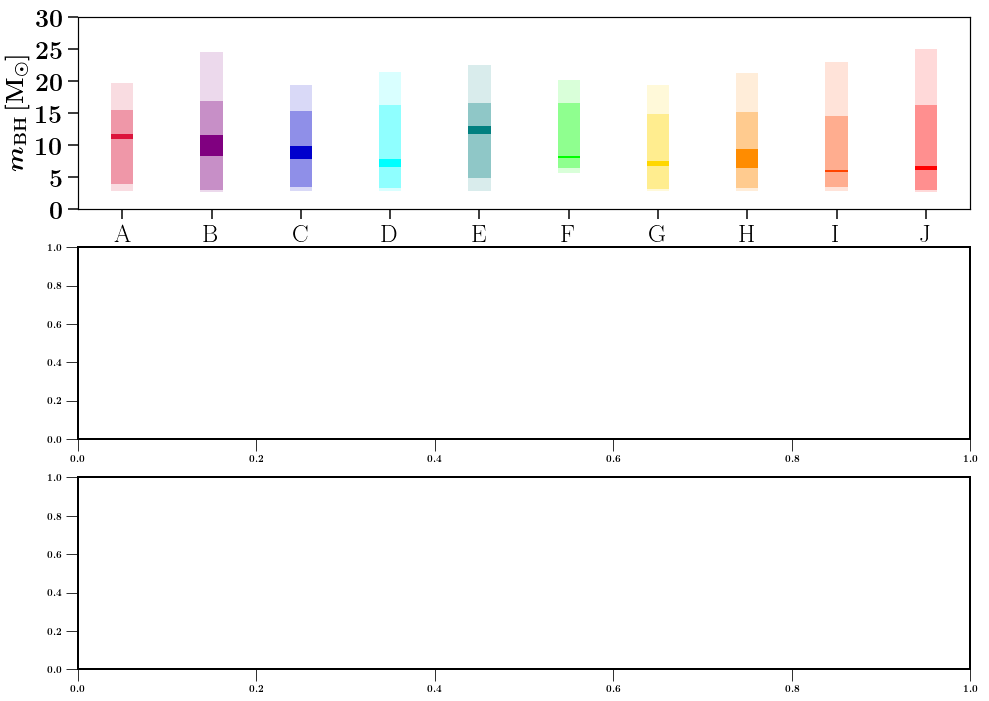

In [151]:
# # ['Mass1', 'Mass2', 'tc',\
# #                    'log10(tc)', 'TotMass', 'ChirpMass', 'q']

# ncols, nrows= 1,3
# f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(16,12), 
#               gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

# xlabel = r'binary population synthesis model $\mu$'

# ylabel = r'$m_{\rm{BH}}  \, [\rm{M}_{\odot}]$'
# xvarind = 0
# plotConfidenceIntervals(DCOtype='BHNS', BPSnameslist=BPSnameslist, xvarind=xvarind,\
#                               axe=axe[0],  ylim=[0,30], xlabel=xlabel, ylabel=ylabel)


# plt.show()

In [18]:
def tfZ(Z):
    Zsolar=0.0142
    logZ = np.log10(Z/Zsolar)
    return logZ
import seaborn as sns

In [19]:
def plotConfidenceIntervals(DCOtype='BHNS', BPSnameslist=['A'], xvarind=0, axe=None,  ylim=None, xlabel='xlabel', ylabel='ylabel'):
    """  
    options:
    
    
    xvarind, index of the variable in the list ['Mass1', 'Mass2', 'tc',\
                   'log10(tc)', 'TotMass', 'ChirpMass', 'q', Z, log(Z/Zsun)]
    
    """
    
    
#     BPScolors       = sns.hls_palette(len(BPSnameslist), l=.46) #  sns.color_palette("huls", (len(BPSnameslist)))
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    #     BPScolors =  = [cm(x) for x in np.linspace(0,1 , (len(BPSnameslist)))] 
    
#     BPScolors = ['crimson', 'purple', 'mediumblue', 'deepskyblue', 'teal', 'yellowgreen', 'gold', 'darkorange', 'orangered', 'red']
    markerstyles = ['+', 'x', 'o', 'x', '+']
    quantileStrings = ['0.005', '0.05', '0.16', '0.25', '0.5', '0.75', '0.84', '0.95', '0.995']
 
    minq0_005= 100
    minq0_05 = 100
    minq0_25 =100
    maxq0_75 = 0
    maxq0_95 = 0
    maxq0_995= 0 
    
    
    
    for ind_m, BPSmodelName in enumerate(BPSnameslist):
        dfname = 'ConfidenceIntervals_model_' + BPSmodelName + '_' + DCOtype + '.csv'
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

            
        ind_max = len(MSSFRnameslist) + xvarind*len(MSSFRnameslist)
        ind_min = xvarind*len(MSSFRnameslist)
        
        dx = 0.3
        dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) + ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)
        for ind_mssfr, MSSFRname in enumerate(MSSFRnameslist):
        
            q0_005= (df.iloc[0][ind_min:ind_max])[ind_mssfr]
            q0_05 = (df.iloc[1][ind_min:ind_max])[ind_mssfr]
            q0_25 = (df.iloc[3][ind_min:ind_max])[ind_mssfr]
            q0_5 = (df.iloc[4][ind_min:ind_max])[ind_mssfr]
            q0_75 = (df.iloc[5][ind_min:ind_max])[ind_mssfr]
            q0_95 = (df.iloc[7][ind_min:ind_max])[ind_mssfr]
            q0_995=(df.iloc[8][ind_min:ind_max])[ind_mssfr]

            
            if xvarind ==7:
                # we want actually the log(Z/Zsun) values:
                Zsolar = 0.0142 # solor metallicity
                q0_005, q0_05, q0_25, q0_5, q0_75, q0_95, q0_995 =\
                tfZ(q0_005), tfZ(q0_05), tfZ(q0_25), tfZ(q0_5), tfZ(q0_75), tfZ(q0_95), tfZ(q0_995)
                
#                 minq0_005, minq0_05, minq0_25, maxq0_75, maxq0_95, maxq0_995 = \
#                 tfZ(minq0_005), tfZ(minq0_05), tfZ(minq0_25), tfZ(maxq0_75), tfZ(maxq0_95), tfZ(maxq0_995)            
            
        
            minq0_005 = np.min([minq0_005, q0_005])
            minq0_05 = np.min([minq0_05, q0_05])
            minq0_25 = np.min([minq0_25, q0_25])
            
            maxq0_75 = np.max([maxq0_75, q0_75])
            maxq0_95 = np.max([maxq0_95, q0_95])
            maxq0_995 = np.max([maxq0_995, q0_995])
            
            

            
            for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):
                
                xx = dxrange[ind_mssfr]
                
                if interval=='median':
                    if (ind_m==0) & (ind_mssfr==0):
                        axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=80, label=None, \
                                marker='*', zorder=300, edgecolor='black')                        
                        
                    axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=20, label=None, \
                                marker='.', zorder=200)        
                else:
                
                    if interval =='99percent':
                        zorder = 102
                        yy = [q0_005, q0_995]
                        alpha = 0.15
                    elif interval=='90percent':
                        zorder = 105
                        yy = [q0_05, q0_95]
                        alpha = 0.25    
                    elif interval=='50percent':
                        zorder = 110
                        yy = [q0_25, q0_75]
                        alpha = 0.4                         
                        
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
                           width=dxlen, zorder=zorder-1)
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color=BPScolors[ind_m], alpha=alpha, \
                           width=dxlen, zorder=zorder)
############        
        
        # draw names just above one of the bar plots 
#         if (ind_m==0) & (xvarind==0):
#             # if we are at fiducial model
#             fontsize=6
#             for ind_mssfr, mssfrName in enumerate(MSSFRnameslist):
#                 xx = dxrange[ind_mssfr]
#                 dy = (ylim[1]-ylim[0])* (1/12.)
#                 yy = maxq0_995 + (ind_mssfr%3)*dy 
#                 axe.text(xx, yy, s=mssfrName, fontsize=fontsize, color='k',\
#                                      ha='center', va='bottom', weight='bold', alpha=1, rotation=90 )
                
#                 axe.plot([xx,xx], [yy], dx=0, dy=, color=BPScolors[ind_m],\
#                            alpha=0.4)        
         
        if (ind_m ==(len(BPSnameslist)-1)) & (xvarind==0):
            # we will plot some text for last value:
            fontsize = fs-10
            xxb= xx+dxlen*3
            dxx = dxlen*8
            textt = 'median' 
            axe.text(xxb, q0_5, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
                     ha='left', va='center', weight='bold' , zorder=10)
            
            
            textt = ' 50'  +'\% '+ r'$ \, $  '  
            yloc = (q0_75-q0_25)*0.75 + q0_25
            axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
                      head_width=0.2,head_length=0.05, alpha=0.8, zorder=10)
            axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
                     ha='left', va='center', weight='bold', alpha=1, zorder=10 )            
            
            
            textt = ' 90'  +'\% '+ r'$ \, $  '  
            yloc = (q0_95-q0_05)*0.75 + q0_05
            axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
                      head_width=0.2,head_length=0.05, alpha=0.5, zorder=10)
            axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
                     ha='left', va='center', weight='bold', alpha=1, zorder=10 )
            
            textt = ' 99'  +'\% '+ r'$ \, $  '  
            yloc = (q0_995-q0_005)*0.88 + q0_005
            
            axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
                      head_width=0.2,head_length=0.05, alpha=0.3, zorder=10)
            axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
                     ha='left', va='center', weight='bold', alpha=1, zorder=10 )
            
            
            
    xx = [-0.5, len(BPSnameslist)+0.5]
    yymax90, yymin90 = [maxq0_95, maxq0_95],  [minq0_05, minq0_05]
    yymax99, yymin99 = [maxq0_995, maxq0_995],  [minq0_005, minq0_005]
    yymax50, yymin50 = [maxq0_75, maxq0_75],  [minq0_25, minq0_25]


    axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='white', zorder=0 , alpha =1 )
    axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='lightgray', zorder=1 , alpha =0.15 )
    
    axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='white', zorder=2 , alpha =1 )
    axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='lightgray', zorder=3 , alpha =0.5 )
    
    axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='white', zorder=4 , alpha =1 )     
    axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='lightgray', zorder=5 , alpha =0.8 )    


    
    axe.set_xlim(-0.5, len(BPSnameslist)+0.5)

    axe.set_ylim(ylim[0], ylim[1])
    
    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=20)
    
    axe.set_xticks(range(len(BPSnameslist)))
    axe.set_xticklabels(BPSnameslist)
    
    if xvarind==0:
        ax2 = axe.twiny()
        ax2.set_xticks(range(len(MSSFRnameslist)+1))
        MSSFRlabels = np.concatenate((np.asarray([r'$ \rm{xyz}: $ ']), MSSFRnameslist))
        ax2.set_xticklabels(MSSFRlabels, rotation=0, fontsize=15)    

        ax2.set_xlim(np.min(range(len(MSSFRnameslist)+1)), np.max(range(len(MSSFRnameslist)+2)))
        ax2.tick_params(top=False)
        
    return 
            
            

            
    
    
    
    

halfway


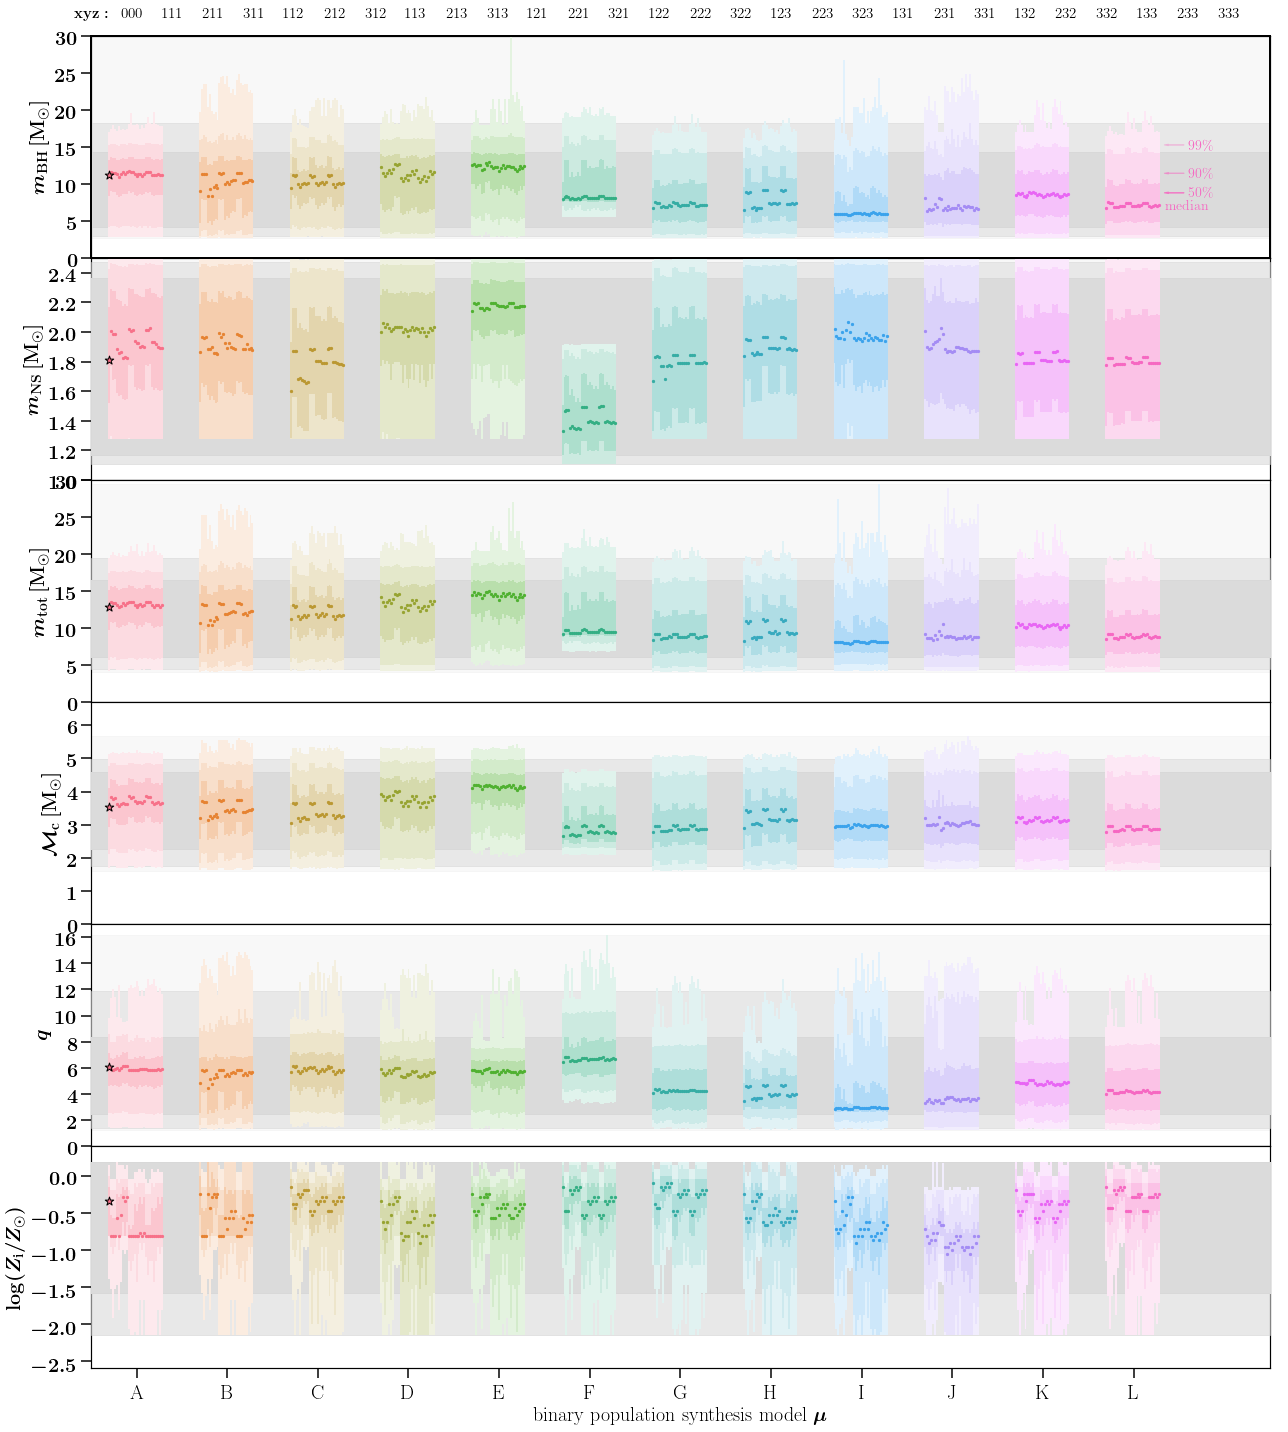

In [22]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Zi]

NumberBPSmodels=12
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='BHNS'
ncols, nrows= 1,6
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

xlabel = r'binary population synthesis model $\mu$'

ylabel = r'$m_{\rm{BH}}  \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[0,30], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$m_{\rm{NS}}   \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[1,2.5], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[0,30], xlabel=xlabel, ylabel=ylabel)
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[0,6.7], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[0,17], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$\log(Z _{\rm{i}} / Z_{\odot})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[-2.6,0.4], xlabel=xlabel, ylabel=ylabel)


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)


f.savefig('./CDF_BPSandMSSFRvariations_Summary_BHNS_Z.png') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./CDF_BPSandMSSFRvariations_Summary_BHNS_Z.pdf') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

In [460]:
print(C)


AA = np.sum(C) / len(C)
BB = np.mean(C)**2

print((AA-BB)/(len(C)-1))

print(np.std(C, ddof=1)**2 / (len(C)) )


print()



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0016161616161616162
0.0016161616161616166


In [439]:
A = np.ones(50)*2
B = np.ones(50)*4

C = np.concatenate((A,B))

print(np.std(C))

print(np.std(C)**2 / len(C))

print(np.mean(C))

1.0
1.0
3.0


halfway
forlast
just saving


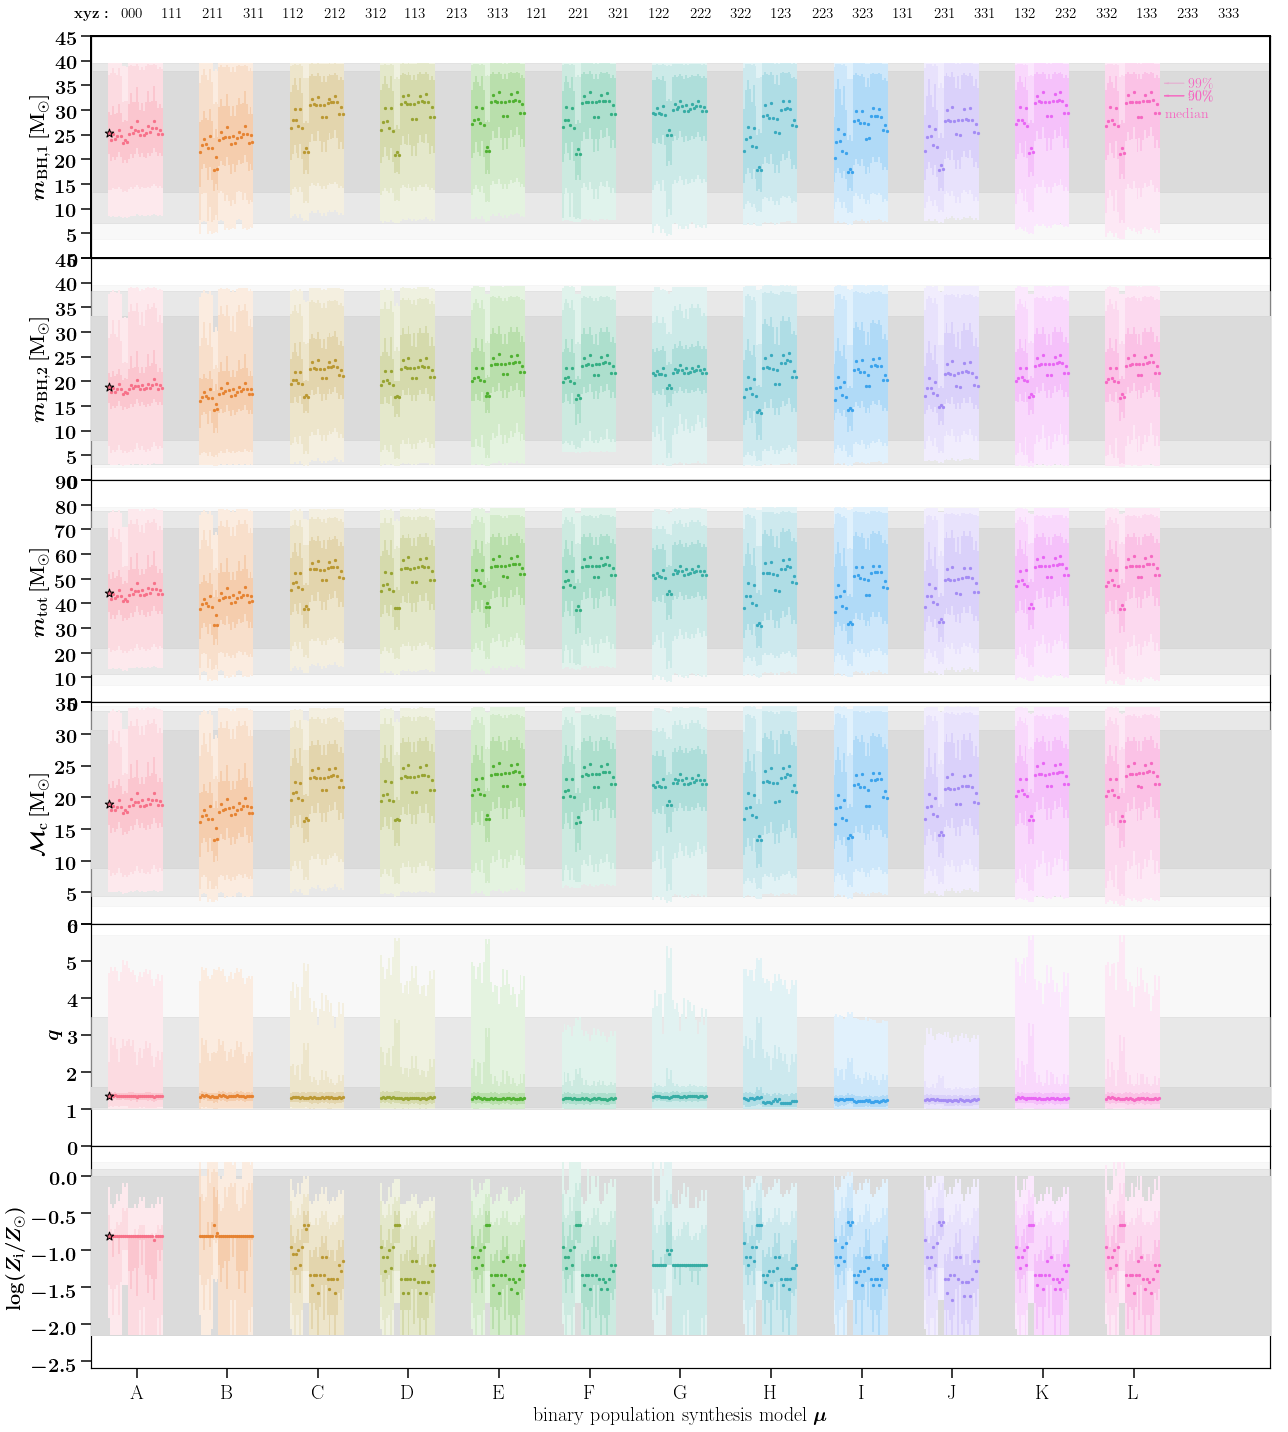

In [25]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q']

NumberBPSmodels=12
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]


DCOtype='BHBH'
ncols, nrows= 1,6
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

xlabel = r'binary population synthesis model $\mu$'

ylabel = r'$m_{\rm{BH,1}} \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[0,45], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$m_{\rm{BH,2}}   \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[0,45], xlabel=xlabel, ylabel=ylabel)



ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[0,90], xlabel=xlabel, ylabel=ylabel)


print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[0,35], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[0,6], xlabel=xlabel, ylabel=ylabel)

print('forlast')

ylabel = r'$\log(Z _{\rm{i}} / Z_{\odot})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[-2.6,0.4], xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

print('just saving')
f.savefig('./CDF_BPSandMSSFRvariations_Summary_' +DCOtype + '_Z.png') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./CDF_BPSandMSSFRvariations_Summary_' +DCOtype +'_Z.pdf') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

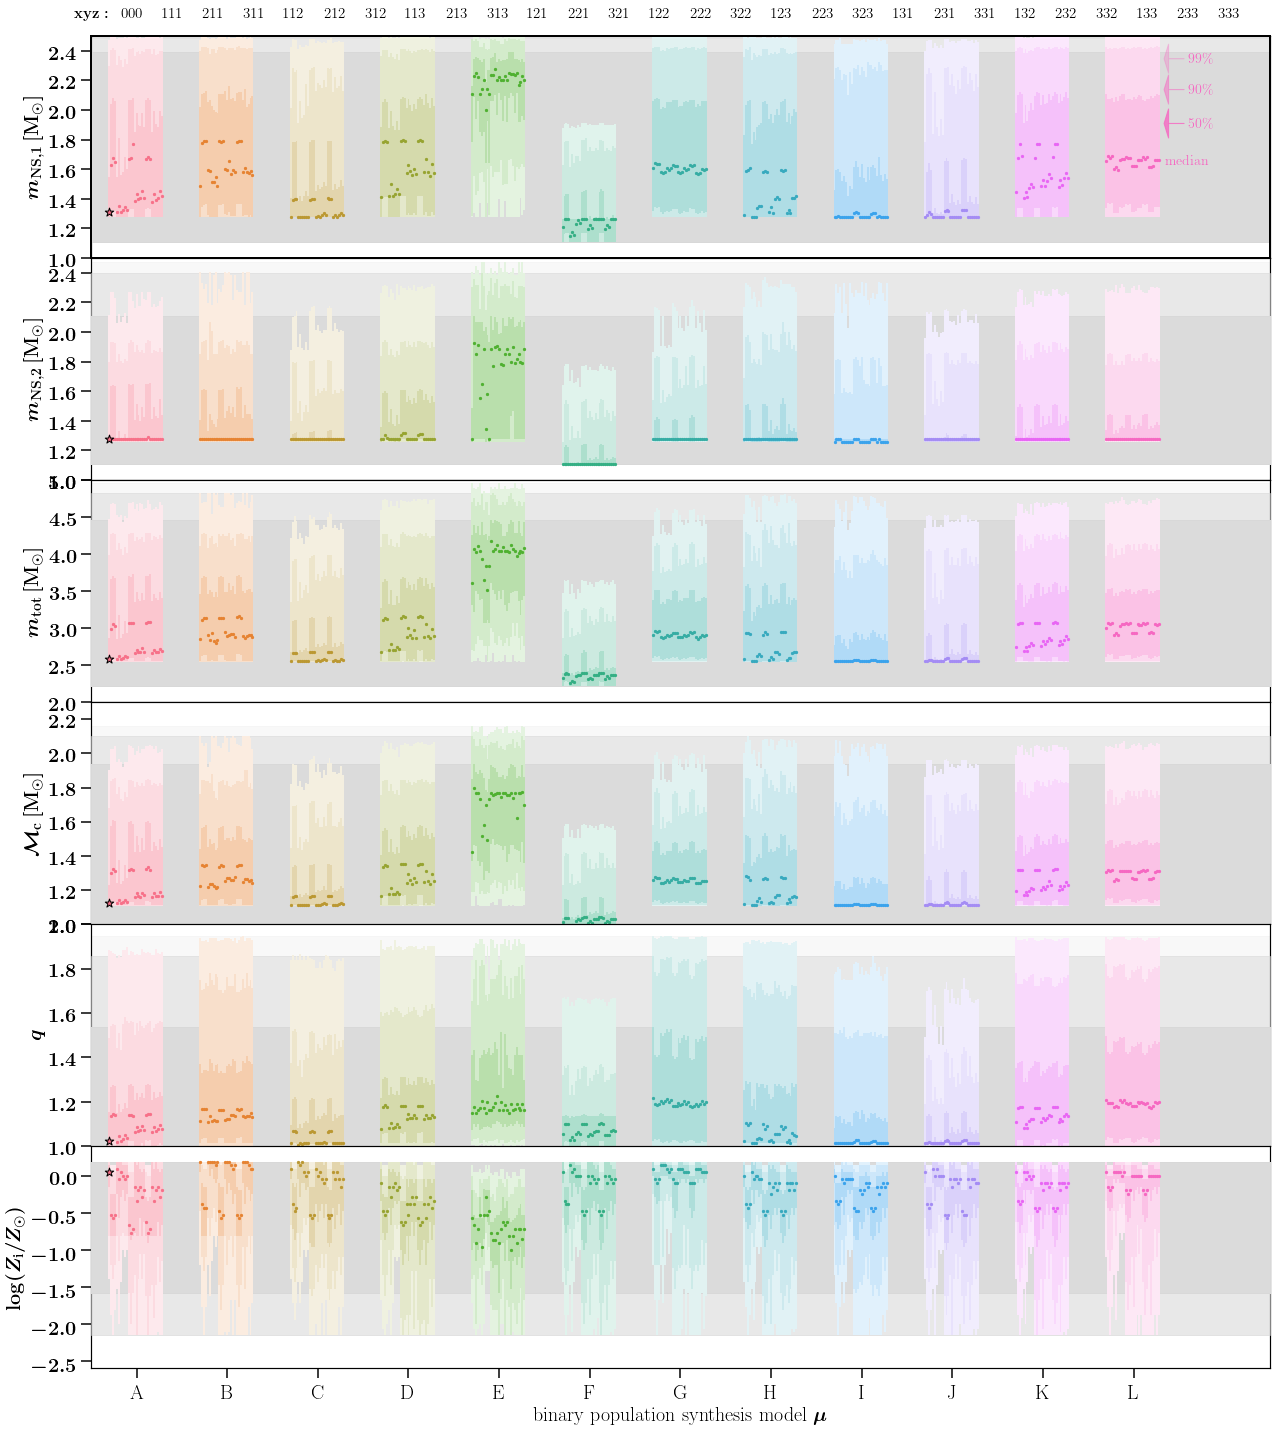

In [23]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q']

NumberBPSmodels=12
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='NSNS'
ncols, nrows= 1,6
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

xlabel = r'binary population synthesis model $\mu$'

ylabel = r'$m_{\rm{NS,1}}   \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[1,2.5], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$m_{\rm{NS,2}}  \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[1,2.5], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[2,5], xlabel=xlabel, ylabel=ylabel)
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[1,2.3], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[1,2], xlabel=xlabel, ylabel=ylabel)


print('forlast')
ylabel = r'$\log(Z _{\rm{i}} / Z_{\odot})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[-2.6,0.4], xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

print('let me just save the image for you!')

f.savefig('./CDF_BPSandMSSFRvariations_Summary_' +DCOtype + '_Z.png') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./CDF_BPSandMSSFRvariations_Summary_' +DCOtype +'_Z.pdf') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

In [ ]:
# TESTING 

In [111]:
round(2.5,0)%6

3.0

# PROBABILITY DENSITY FUNCTION

In [4]:
%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# GWTC-1 BHBH



In [6]:
a_BBH =  np.random.choice(BBHs)

print('We will use ', a_BBH, 'as an example of a BBH')

BBH_file = '/Users/floorbroekgaarden/Projects/GWTC-1_LVK_catalog/GWTC-1_sample_release/'+a_BBH+'_GWTC-1.hdf5'

BBH = h5py.File(BBH_file, 'r')
M2 = BBH['Overall_posterior']['m2_detector_frame_Msun']
print('This file contains four datasets: ', BBH.keys())

We will use  GW170729 as an example of a BBH
This file contains four datasets:  [u'IMRPhenomPv2_posterior', u'Overall_posterior', u'SEOBNRv3_posterior', u'prior']


In [34]:
BBH = 'GW190408_181802'
BBH_file = '/Users/floorbroekgaarden/Projects/GWTC-1_LVK_catalog/GWTC-2_sample_release/'+BBH+ '/'+BBH+'.h5'
BBH = h5py.File(BBH_file, 'r')
print(BBH.keys())
print('-------')
for ii, temp in enumerate((BBH.keys())):
    print(BBH[temp]['posterior_samples'])

[u'C01:IMRPhenomD', u'C01:IMRPhenomPv2', u'C01:SEOBNRv4P', u'C01:SEOBNRv4PHM', u'PrecessingSpinIMR', u'PrecessingSpinIMRHM', u'PublicationSamples', u'ZeroSpinIMR', u'history', u'version']
-------
<HDF5 dataset "posterior_samples": shape (41622,), type "|V912">
<HDF5 dataset "posterior_samples": shape (46672,), type "|V1064">
<HDF5 dataset "posterior_samples": shape (24477,), type "|V1168">
<HDF5 dataset "posterior_samples": shape (37366,), type "|V448">
<HDF5 dataset "posterior_samples": shape (48954,), type "|V1168">
<HDF5 dataset "posterior_samples": shape (37366,), type "|V448">
<HDF5 dataset "posterior_samples": shape (37366,), type "|V448">
<HDF5 dataset "posterior_samples": shape (41622,), type "|V912">


KeyError: "Unable to open object (object 'posterior_samples' doesn't exist)"

In [27]:
BBHsGWTC1 = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170818', 'GW170823']
BNSsGWTC1 =['GW170817']
BBHsGWTC2 = ['GW190408_181802']
BNSsGWTC2 =[]

def obtainGWTC1_MassAndWeight(DCOtype):
    
    
    M1all, M2all = [], []
    Weightsall = []
    
    if DCOtype=='BHBH':
        print('doing GWTC-1 BBH')
        for ind_bbh, BBH in enumerate(BBHsGWTC1):
            BBH_file = '/Users/floorbroekgaarden/Projects/GWTC-1_LVK_catalog/GWTC-1_sample_release/'+BBH+'_GWTC-1.hdf5'
            BBH = h5py.File(BBH_file, 'r')
            M1 = BBH['Overall_posterior']['m1_detector_frame_Msun']
            M2 = BBH['Overall_posterior']['m2_detector_frame_Msun']
            print(len(M1))
            print(len(M2))
            M1all = np.concatenate((M1, M1all))
            M2all = np.concatenate((M2, M2all))


            w = np.ones_like(M1) * (1./len(M1))
            Weightsall = np.concatenate((w, Weightsall))
        print('doing GWTC-2 BBH')
        for ind_bbh, BBH in enumerate(BBHsGWTC2):
            BBH_file = '/Users/floorbroekgaarden/Projects/GWTC-1_LVK_catalog/GWTC-2_sample_release/'+BBH+ '/'+BBH+'.h5'
            BBH = h5py.File(BBH_file, 'r')
            print(BBH['C01:IMRPhenomD']['posterior_samples'].keys())
            M1 = BBH['Overall_posterior']['m1_detector_frame_Msun']
            M2 = BBH['Overall_posterior']['m2_detector_frame_Msun']
            print(len(M1))
            print(len(M2))
            M1all = np.concatenate((M1, M1all))
            M2all = np.concatenate((M2, M2all))


            w = np.ones_like(M1) * (1./len(M1))
            Weightsall = np.concatenate((w, Weightsall))
            
    elif DCOtype=='NSNS':
        print('doing GWTC-1 BNS')
        for ind_bbh, BNS in enumerate(BNSsGWTC1):
            BNS_file = '/Users/floorbroekgaarden/Projects/GWTC-1_LVK_catalog/GWTC-1_sample_release/'+BNS+'_GWTC-1.hdf5'
            BNS = h5py.File(BNS_file, 'r')
            M1 = BNS['IMRPhenomPv2NRT_lowSpin_posterior']['m1_detector_frame_Msun']
            M2 = BNS['IMRPhenomPv2NRT_lowSpin_posterior']['m2_detector_frame_Msun']
            print(len(M1))
            print(len(M2))
            M1all = np.concatenate((M1, M1all))
            M2all = np.concatenate((M2, M2all))


            w = np.ones_like(M1) * (1./len(M1))
            Weightsall = np.concatenate((w, Weightsall))
            
        print('doing GWTC-2 BNS')
        for ind_bbh, BNS in enumerate(BNSsGWTC2):
            BNS_file = '/Users/floorbroekgaarden/Projects/GWTC-1_LVK_catalog/GWTC-2_sample_release/'+BNS+'_GWTC-1.hdf5'
            BNS = h5py.File(BNS_file, 'r')
            M1 = BNS['IMRPhenomPv2NRT_lowSpin_posterior']['m1_detector_frame_Msun']
            M2 = BNS['IMRPhenomPv2NRT_lowSpin_posterior']['m2_detector_frame_Msun']
            print(len(M1))
            print(len(M2))
            M1all = np.concatenate((M1, M1all))
            M2all = np.concatenate((M2, M2all))


            w = np.ones_like(M1) * (1./len(M1))
            Weightsall = np.concatenate((w, Weightsall))
        
    return M1all, M2all, Weightsall



In [28]:
M1all, M2all, Weightsall = obtainGWTC1_MassAndWeight(DCOtype='BHBH')


doing GWTC-1 BBH
8350
8350
16096
16096
52252
52252
24972
24972
6448
6448
5112
5112
14802
14802
40000
40000
5862
5862
4278
4278
doing GWTC-2 BBH


AttributeError: 'Dataset' object has no attribute 'keys'

In [382]:
def histvalueToAlphaLog(h):
    
    minAlpha, maxAlpha = 0.4,1
    minh, maxh = 0.01, .2
    
    
    if h==0:
        val = 0
        return val
        
        
#     h = np.log10(h)
    
    if  h<= 0.0001:
        
        val = 0.1
        return val
    elif  h<= 0.001:
        
        val = 0.2
        return val
    elif  h<= 0.01:
        
        val = 0.3
        return val
    
    elif h>=maxh:
        val=0.999
        return val
    
    else:
        dh = (maxh - minh)  
        dAlpha = (maxAlpha - minAlpha)  
        val = (((h - minh) * dAlpha) / dh) + minAlpha    

    
#     alphaspace = np.linspace(minAlpha, maxAlpha, nrAlphas)
    
#     if h >=maxh:
#         alpha = maxAlpha
#     elif h==0:
#         alpha=0
#     elif h<=minh:
#         alpha=0
        
#     else:

#         dh = np.log10(maxh) - np.log10(minh)
#         dalpha  = maxAlpha - minAlpha
  




#         hh = np.log10(h)
#         hh = hh * (dalpha/dh) + (maxAlpha - (np.log10(maxh)* (dalpha/dh)))




#         for ind, alphas in enumerate(alphaspace):
#             if hh>= alphas:
#                 alpha = alphas
    
    
    
    
        return val
    
    
    
    
    
    
    

In [379]:
            OldRange = (-6 - OldMin)  
            NewRange = (NewMax - NewMin)  
            NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin

NameError: name 'OldMin' is not defined

In [351]:
# def histvalueToAlphaLog(h):
#     nrAlphas = 10
#     minAlpha = 0.
#     maxAlpha = 1
#     minh, maxh = 0.001, 0.4
    
#     alphaspace = np.linspace(minAlpha, maxAlpha, nrAlphas)
    
#     if h >=maxh:
#         alpha = maxAlpha
#     elif h==0:
#         alpha=0
#     elif h<=minh:
#         alpha=0
        
#     else:

#         dh = np.log10(maxh) - np.log10(minh)
#         dalpha  = maxAlpha - minAlpha
  




#         hh = np.log10(h)
#         hh = hh * (dalpha/dh) + (maxAlpha - (np.log10(maxh)* (dalpha/dh)))




#         for ind, alphas in enumerate(alphaspace):
#             if hh>= alphas:
#                 alpha = alphas
    
    
    
    
#     return alpha 
    
    
    
    
    
    
    

In [314]:
def histvalueToAlphaLin(h):
    nrAlphas = 50
    minAlpha = 0
    maxAlpha = 1
    minh, maxh = 0.001, 0.1
    
    alphaspace = np.linspace(minAlpha, maxAlpha, nrAlphas)
    
    if h >=maxh:
        alpha = 1
    elif h==0:
        alpha=0
    elif h<=minh:
        alpha=0
        
    else:

        dh = (maxh) - (minh)
        dalpha  = maxAlpha - minAlpha
  




        hh = (h)
        hh = hh * (dalpha/dh) + (maxAlpha - ((maxh)* (dalpha/dh)))




        for ind, alphas in enumerate(alphaspace):
            if hh>= alphas:
                alpha = alphas
    
    
    
    
    return alpha 
    
    
    
    
    
    
    

In [315]:
print(histvalueToAlphaLog(0.1))

0.7777777777777777


# PLOT PDFs!

In [437]:
def plotPDF(DCOtype='BHNS', BPSnameslist=['A'], xvarname=0, bins=20, axe=None,  ylim=None, xlabel='xlabel', ylabel='ylabel', whichWeight='det'):
    """  
    options:
    
    
    xvarind, index of the variable in the list ['Mass1', 'Mass2', 'tc',\
                   'log10(tc)', 'TotMass', 'ChirpMass', 'q', Z, log(Z/Zsun)]
    
    """
    
    
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    Zsolar=0.0142

    # naming is slightly different for some files
    if DCOtype=='BHNS':
        DCOname='BHNS'
    elif DCOtype=='BHBH':
        DCOname='BBH'
    elif DCOtype=='NSNS':
        DCOname='BNS'
    
    
    Virgo         = '/Volumes/Virgo/DATA/BHNS/'
    VirgoAllDCO = '/Volumes/Virgo/DATA/AllDCO/'
    AndromedaBHNS = '/Volumes/Andromeda/DATA/BHNS/'
    AndromedaAllDCO  = '/Volumes/Andromeda/DATA/AllDCO/'

    alphabet = list(string.ascii_uppercase)
    BPSnameslistD = alphabet[:12]

    BPSdir = ['fiducial/', 'fiducial/', 'alpha0_5/', 'alpha2_0/', 'unstableCaseBB/', 'rapid/', 'zeroBHkick/', 'massTransferEfficiencyFixed_0_25/', 'massTransferEfficiencyFixed_0_5/', 'massTransferEfficiencyFixed_0_75/', 'ccSNkick_100km_s/', 'ccSNkick_30km_s/']

    dictBPSnameToDir   = dict(zip(BPSnameslistD, BPSdir))    
    dictBPSnameToColor = dict(zip(BPSnameslistD, BPScolors))
    
    
    

    for ind_m, BPSmodelName in enumerate(BPSnameslist):
        # READ IN DATAFILE 
        if BPSmodelName in ['A', 'B', 'C',  'D', 'E', 'F', 'G', 'H',  'I', 'J', 'K', 'L']:
            path1 = AndromedaAllDCO
            path1 = path1 + dictBPSnameToDir[BPSmodelName]
            path = path1 + 'COMPASCompactOutput_'+ DCOname +'_' + BPSmodelName + '.h5'
        else:
            print('error: path does not exist')    



        fdata = h5.File(path)

        # obtain BH and NS masses
        if xvarname in ['Mass1', 'Mass2', 'TotMass', 'ChirpMass', 'q']:
            M1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
            M2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
            MBH, MNS = obtainM1BHandM2BHassymetric(M1, M2)
            del M1
            del M2  

            if xvarname=='Mass1':
                xvar = MBH
            elif xvarname=='Mass2':
                xvar = MNS
            elif xvarname=='TotMass':
                xvar = MBH + MNS
            elif xvarname=='ChirpMass':
                xvar = chirpmass(MBH,MNS)
            elif xvarname=='q':
                xvar = MBH/MNS

        elif xvarname in ['tc','log10(tc)']:
            xvar = fdata['doubleCompactObjects']['tc'][...].squeeze() /1000.  # in Gyr
            if xvarname=='log10(tc)':
                xvar = np.log10(xvar)

        elif xvarname in ['metallicitySystems', 'log10metallicitySystems']:
            xvar = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            if xvarname=='log10metallicitySystems':
                xvar = np.log10(xvar/Zsolar)

        else: 
            print('error in xvarname')




   

        print('now at model ', BPSmodelName)



        ind_max = len(MSSFRnameslist) + xvarind*len(MSSFRnameslist)
        ind_min = xvarind*len(MSSFRnameslist)

        dx = 0.3
        dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) + ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)


        # which weights do we want?
        if whichWeight =='det':
            fparam_name ='weights_detected'
        elif whichWeight=='z0':
            fparam_name = 'weights_intrinsic'



        for ind_mssfr, mssfr in enumerate(MSSFRnameslist):
            weightheader = 'w_' + mssfr
            weights = fdata[fparam_name][weightheader][...].squeeze()


#                 print('now at mssfr ', ind_mssfr+1, 'out of ', len(MSSFRnameslist))        




            hist, bin_edges = np.histogram(a=xvar, bins=bins, density=True, weights=weights)
            hist = hist * (bins[-1]-bins[0])/(len(bins)-1) # normalize s.t. np.sum(hist)=1

#                 print(np.sum(hist), '=1? should be!!!!')
#             if ind_mssfr==0:
#                 print(hist)


            xx = dxrange[ind_mssfr]
            xxx = [dxrange[ind_mssfr]-dxlen, dxrange[ind_mssfr]+dxlen]
            cm       = plt.get_cmap('viridis')
            


            # iterate over histogram bins (from low to high)
            for ind_bin, binedge in enumerate(bin_edges[1:]):
                # get alpha mapping from function

                ALPHA = histvalueToAlphaLog(hist[ind_bin])
                
                
                
                yyy1 = bin_edges[ind_bin]
#                 if (ind_mssfr==0) & (ind_m==0):
#                     print(hist[ind_bin],   ALPHA , 'for mbh=', yyy1)
#                 axe.fill_between(xxx, y1=[yyy1, yyy1], y2=[binedge,binedge], alpha=1, color='white', \
#                                  zorder=100,  edgecolor='k', lw=20)
                axe.fill_between(xxx, y1=[yyy1, yyy1], y2=[binedge,binedge], color=cm(ALPHA), \
                                 zorder=200, edgecolor='k', lw=0.5)


    if DCOtype in ['BHBH', 'NSNS']:
        print("now doing GWTC-1 catalog observations")
    
        # obtain GWTC-1 distribution "ish"
        if xvarname in ['Mass1', 'Mass2', 'TotMass', 'ChirpMass', 'q']:
            
            M1_GWTC1, M2_GWTC1, w_GWTC1 = obtainGWTC1_MassAndWeight(DCOtype) 


            MBH, MNS = obtainM1BHandM2BHassymetric(M1_GWTC1, M2_GWTC1)


            if xvarname=='Mass1':
                xvar = MBH
            elif xvarname=='Mass2':
                xvar = MNS
            elif xvarname=='TotMass':
                xvar = MBH + MNS
            elif xvarname=='ChirpMass':
                xvar = chirpmass(MBH,MNS)
            elif xvarname=='q':
                xvar = MBH/MNS    



            hist, bin_edges = np.histogram(a=xvar, bins=bins, density=True, weights=w_GWTC1)
            hist = hist * (bins[-1]-bins[0])/(len(bins)-1) # normalize s.t. np.sum(hist)=1

            dx = 0.1

            xx = dxrange[ind_mssfr]
            xxx = [ind_m +1 - dx, ind_m +1 +dx]
            cm       = plt.get_cmap('viridis')

            # iterate over histogram bins (from low to high)
            for ind_bin, binedge in enumerate(bin_edges[1:]):
                # get alpha mapping from function
                ALPHA = histvalueToAlphaLog(hist[ind_bin])


                yyy1 = bin_edges[ind_bin]

                axe.fill_between(xxx, y1=[yyy1, yyy1], y2=[binedge,binedge], color=cm(ALPHA), \
                                 zorder=200, edgecolor='k', lw=0.5)



    
    axe.set_xlim(-0.5, len(BPSnameslist)+1.5)

    axe.set_ylim(ylim[0], ylim[1])
    
    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=20)
    axe.text(0.99, 0.8, DCOtype, rotation = 0, fontsize = fs+4, color = 'k', ha = 'right',transform=axe.transAxes)#, weight = 'bold')    
    axe.set_xticks(range(len(BPSnameslist)))
    axe.set_xticklabels(BPSnameslist)
    
    if xvarname=='Mass1':
        ax2 = axe.twiny()
        ax2.set_xticks(range(len(MSSFRnameslist)+1))
        MSSFRlabels = np.concatenate((np.asarray([r'$ \rm{xyz}: $ ']), MSSFRnameslist))
        ax2.set_xticklabels(MSSFRlabels, rotation=0, fontsize=15)    

        ax2.set_xlim(np.min(range(len(MSSFRnameslist)+1)), np.max(range(len(MSSFRnameslist)+2)))
        ax2.tick_params(top=False)
        
    return 
            
            

            
    
    
    
    

now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
halfway
now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now at model  A
now at model  B


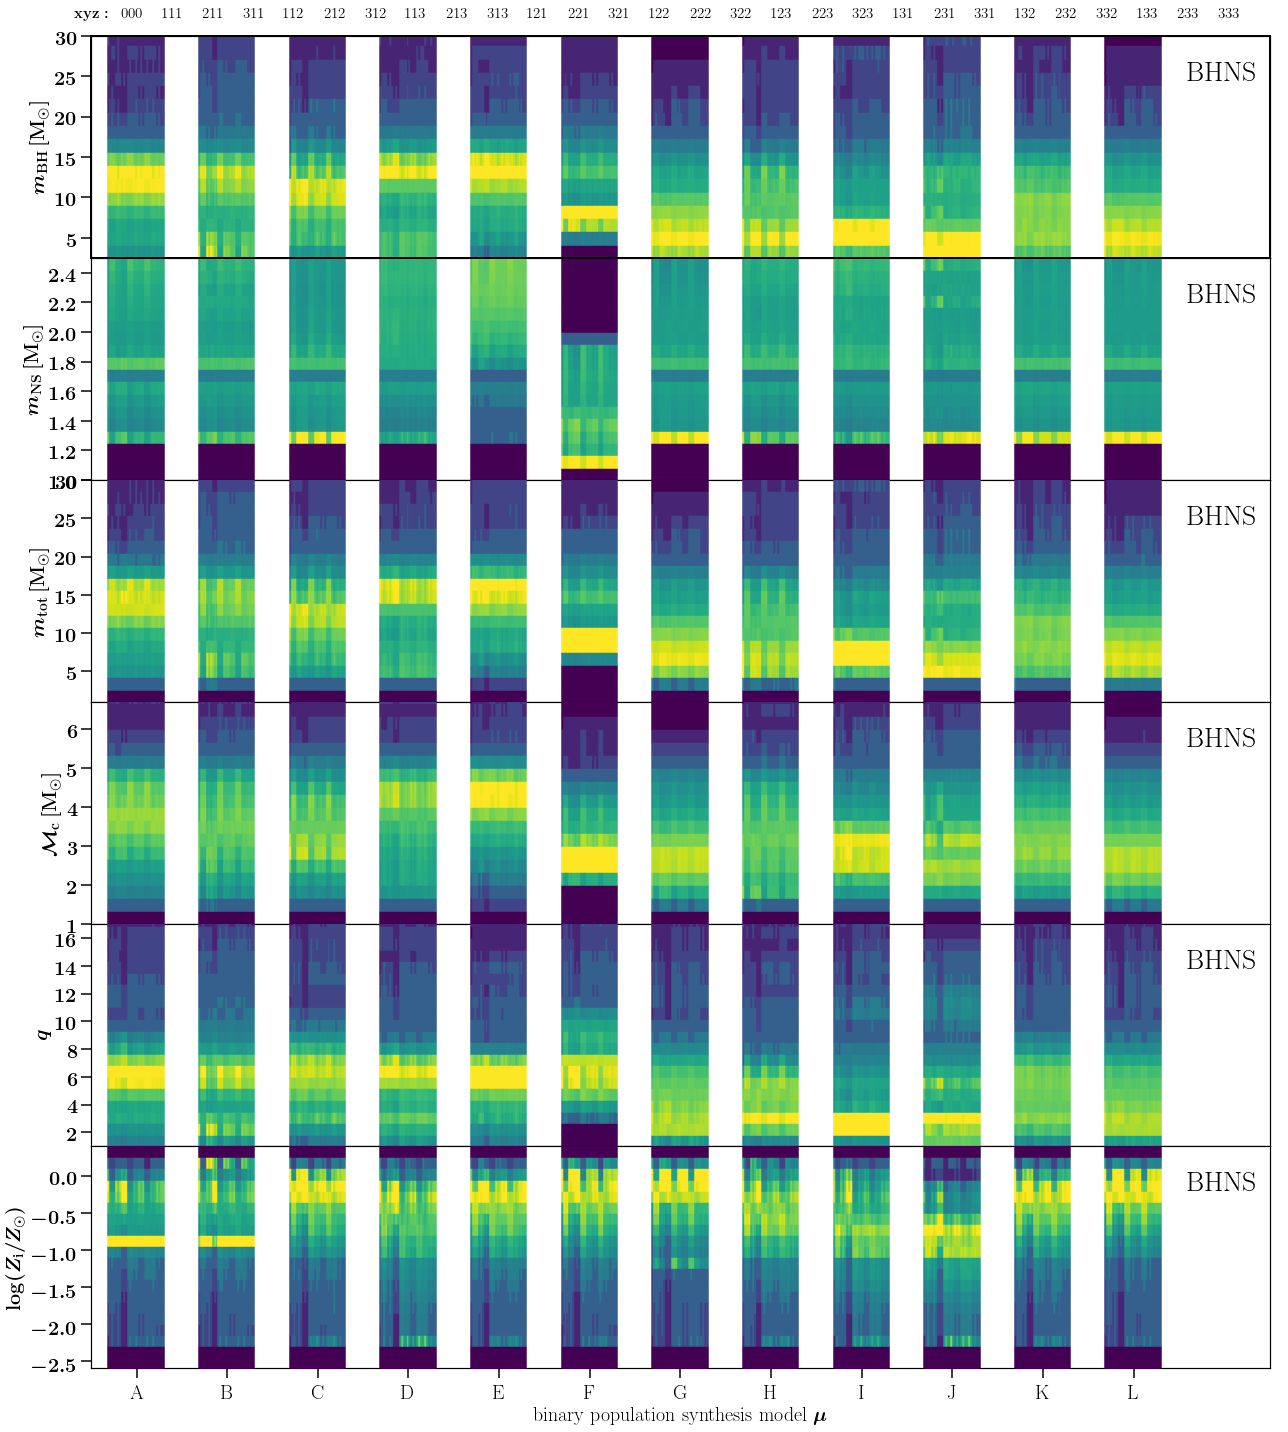

In [411]:
NumberBPSmodels=12
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]
# BPSnameslist=['A']
DCOtype='BHNS'
ncols, nrows= 1,6
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


xlabel = r'binary population synthesis model $\mu$'



# BH MASS 
ylabel = r'$m_{\rm{BH}}   \, [\rm{M}_{\odot}]$'
bins = np.linspace(2.5,42,25)
xvarname='Mass1'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[0],  ylim=[2.5,30], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    
    
# NS MASS     
ylabel = r'$m_{\rm{NS}}   \, [\rm{M}_{\odot}]$'
bins = np.linspace(1,3,25)
xvarname='Mass2'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[1],  ylim=[1,2.5], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    
# NS MASS     
ylabel = r'$m_{\rm{tot}}   \, [\rm{M}_{\odot}]$'
bins = np.linspace(1,40,25)
xvarname='TotMass'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[2],  ylim=[1,30], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    

    
    
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarname='ChirpMass'
bins = np.linspace(1,9,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[3],  ylim=[1,6.7], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    






xvarname='q'
ylabel = r'$q$'
bins = np.linspace(1,21,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[4],  ylim=[1,17], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    

xvarname='log10metallicitySystems'
ylabel = r'$\log(Z _{\rm{i}} / Z_{\odot})$'
bins = np.linspace(-2.6,1,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[5],  ylim=[-2.6,0.4], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    



    
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)    
    
print('lemme just save this image')
f.savefig('./PDF_BPSandMSSFRvariations_Summary_' +DCOtype + '_Z.png', dpi=600 ) #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./PDF_BPSandMSSFRvariations_Summary_' +DCOtype +'_Z.pdf') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now doing GWTC-1 catalog observations
doing GWTC-1 BBH
8350
8350
16096
16096
52252
52252
24972
24972
6448
6448
5112
5112
14802
14802
40000
40000
5862
5862
4278
4278
now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now doing GWTC-1 catalog observations
doing GWTC-1 BBH
8350
8350
16096
16096
52252
52252
24972
24972
6448
6448
5112
5112
14802
14802
40000
40000
5862
5862
4278
4278
now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now doing GWTC-1 catalog observations
doing GWTC-1 BBH
8350
8350
16096
16096
52252
52252
24972

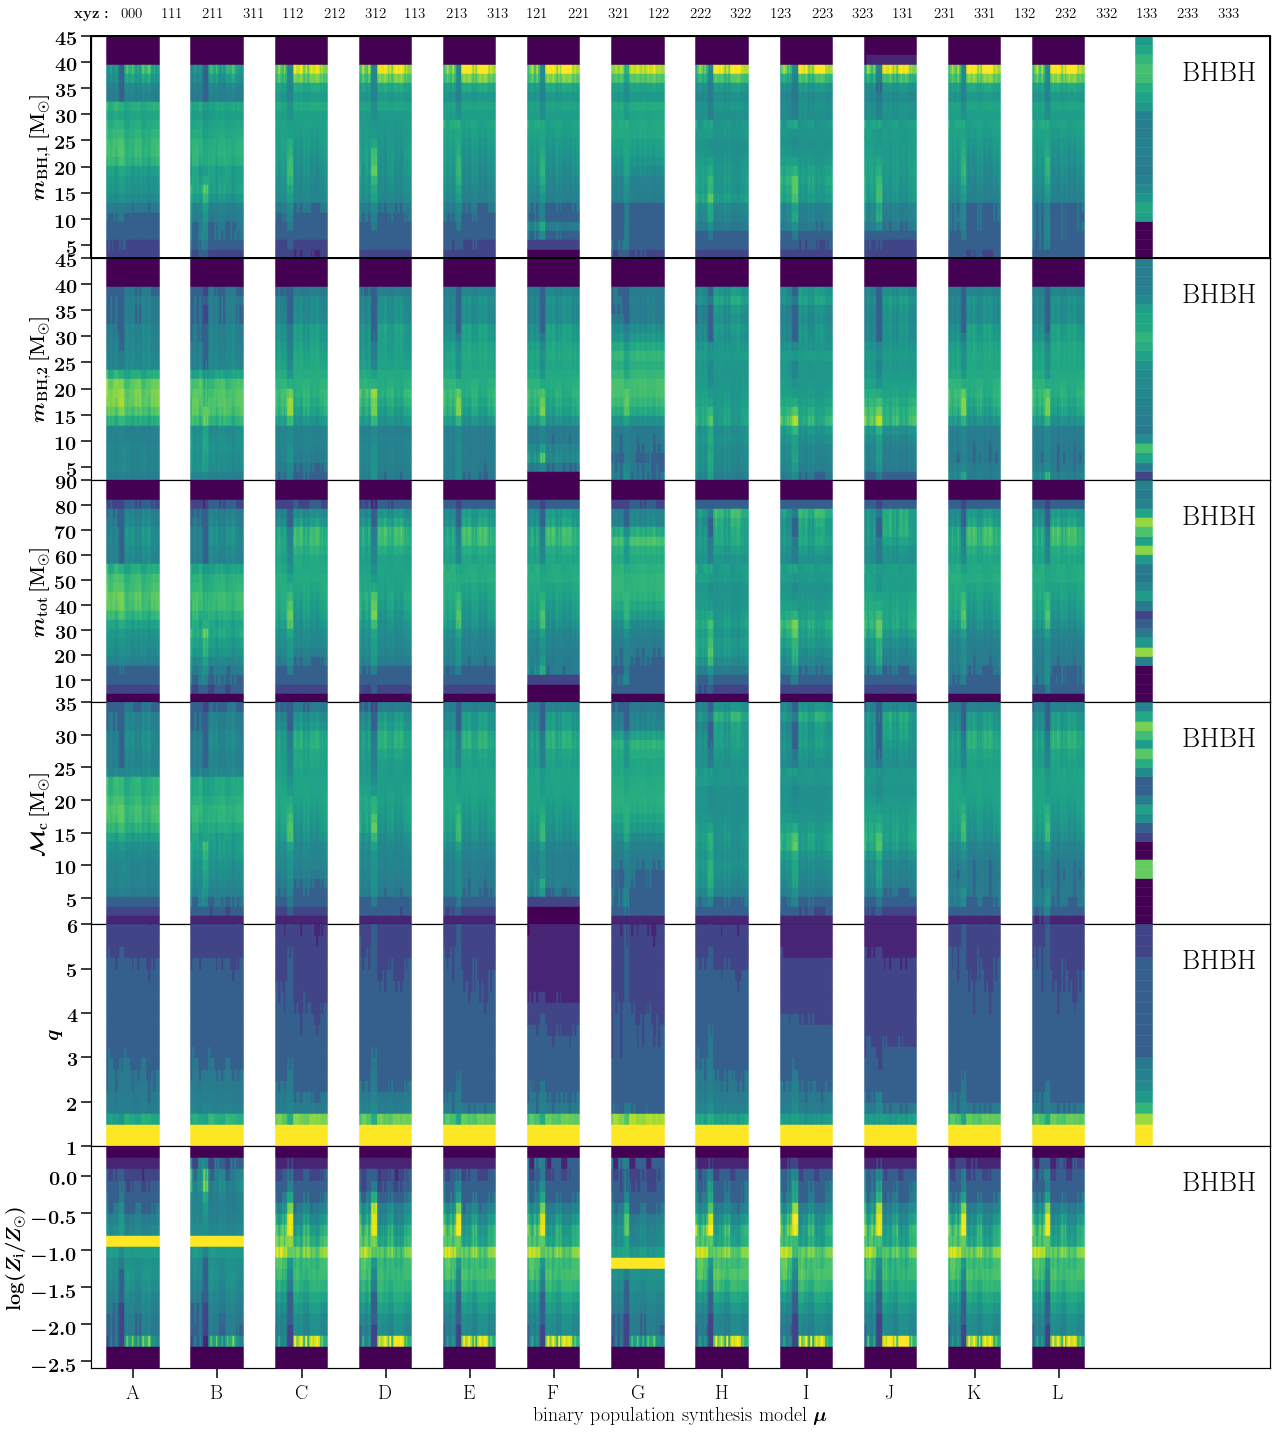

In [438]:
NumberBPSmodels=12
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]
# BPSnameslist=['A']
DCOtype='BHBH'
ncols, nrows= 1,6
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


xlabel = r'binary population synthesis model $\mu$'



# BH MASS 
ylabel = r'$m_{\rm{BH,1}}   \, [\rm{M}_{\odot}]$'
bins = np.linspace(2.5,45,25)
xvarname='Mass1'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[0],  ylim=[2.5,45], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    
    
# NS MASS     
ylabel = r'$m_{\rm{BH,2}}   \, [\rm{M}_{\odot}]$'
bins = np.linspace(2.5,45,25)
xvarname='Mass2'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[1],  ylim=[2.5,45], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    
# NS MASS     
ylabel = r'$m_{\rm{tot}}   \, [\rm{M}_{\odot}]$'
bins = np.linspace(1,90,25)
xvarname='TotMass'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[2],  ylim=[1,90], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    

    
    
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarname='ChirpMass'
bins = np.linspace(1,35,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[3],  ylim=[1,35], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    






xvarname='q'
ylabel = r'$q$'
bins = np.linspace(1,7,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[4],  ylim=[1,6], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    

xvarname='log10metallicitySystems'
ylabel = r'$\log(Z _{\rm{i}} / Z_{\odot})$'
bins = np.linspace(-2.6,1,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[5],  ylim=[-2.6,0.4], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    



    
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)    
    
print('lemme just save this image')
f.savefig('./PDF_BPSandMSSFRvariations_Summary_' +DCOtype + '_Z.png', dpi=600 ) #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./PDF_BPSandMSSFRvariations_Summary_' +DCOtype +'_Z.pdf') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now doing GWTC-1 catalog observations
8078
8078
now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now doing GWTC-1 catalog observations
8078
8078
now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now doing GWTC-1 catalog observations
8078
8078
halfway
now at model  A
now at model  B
now at model  C
now at model  D
now at model  E
now at model  F
now at model  G
now at model  H
now at model  I
now at model  J
now at model  K
now at model  L
now doing GWTC-1 catalog observations
8078
8078
now at model  A
now at model  B


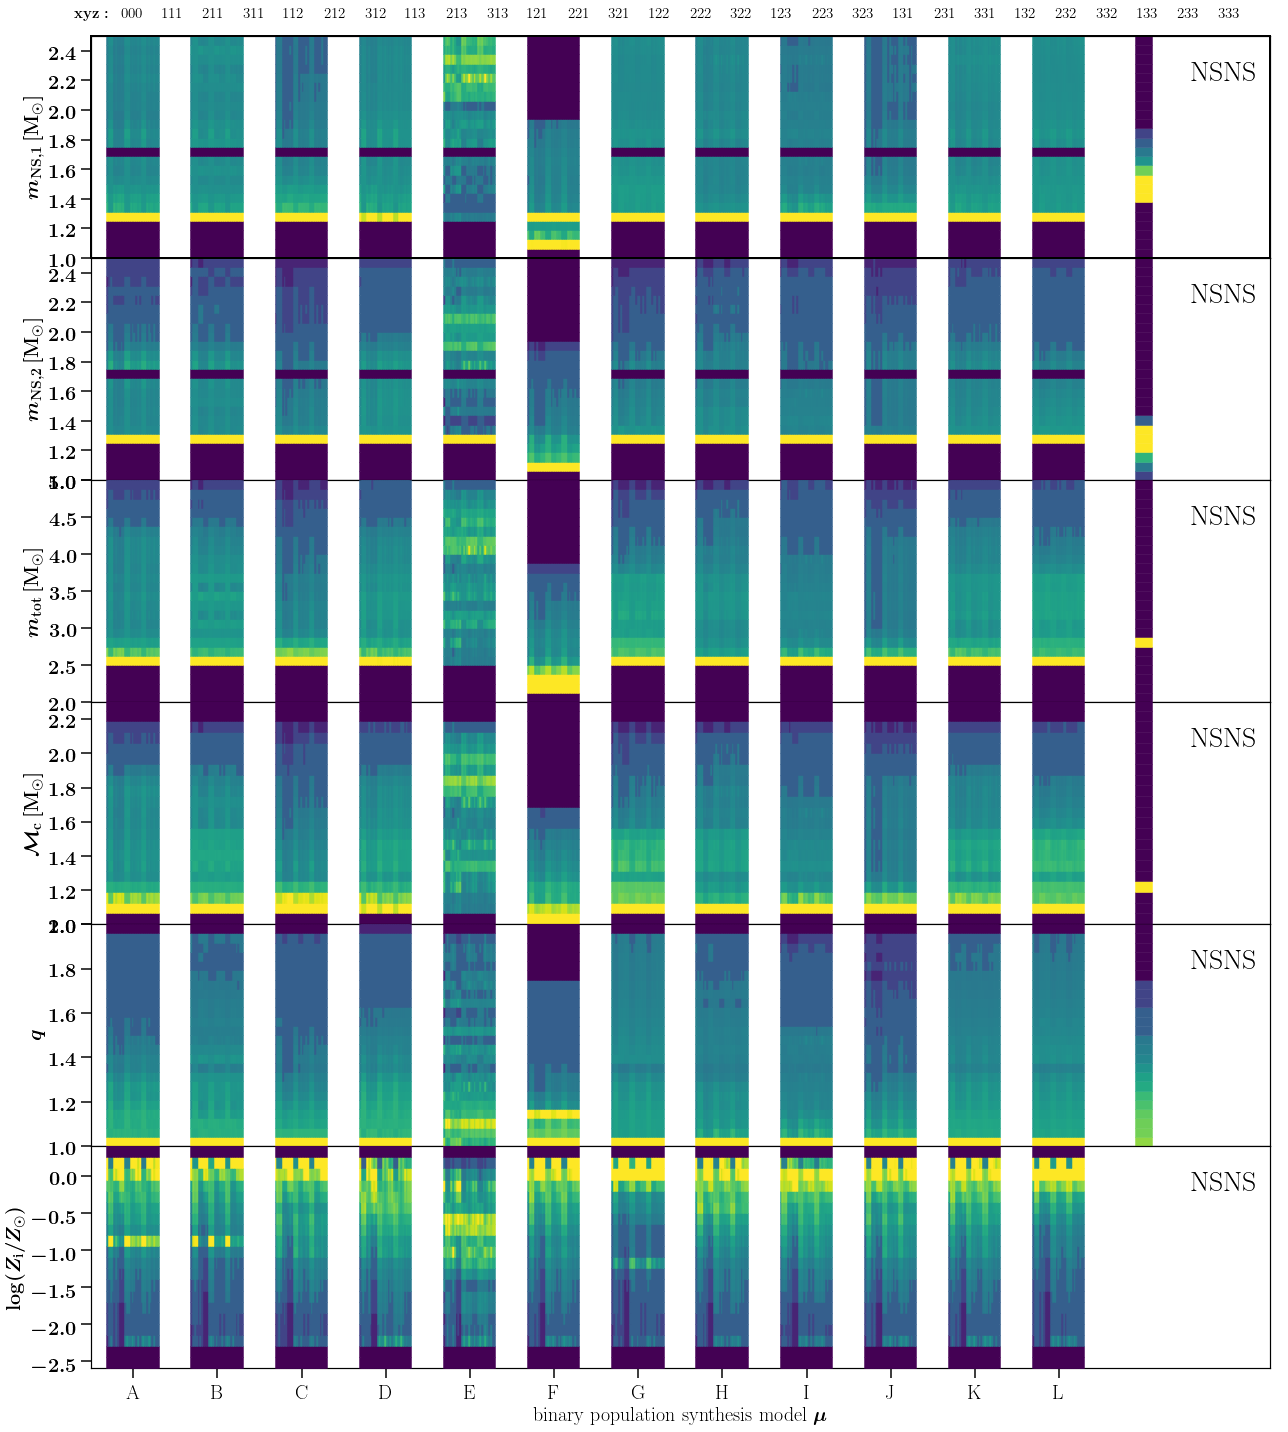

In [439]:
NumberBPSmodels=12
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]
# BPSnameslist=['A']
DCOtype='NSNS'
ncols, nrows= 1,6
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


xlabel = r'binary population synthesis model $\mu$'



# BH MASS 
ylabel = r'$m_{\rm{NS,1}}   \, [\rm{M}_{\odot}]$'
bins = np.linspace(1.0,2.5,25)
xvarname='Mass1'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[0],  ylim=[1,2.5], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    
    
# NS MASS     
ylabel = r'$m_{\rm{NS,2}}   \, [\rm{M}_{\odot}]$'
bins = np.linspace(1.0,2.5,25)
xvarname='Mass2'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[1],  ylim=[1,2.5], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    
# NS MASS     
ylabel = r'$m_{\rm{tot}}   \, [\rm{M}_{\odot}]$'
bins = np.linspace(2,5,25)
xvarname='TotMass'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[2],  ylim=[2,5], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    

    
    
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarname='ChirpMass'
bins = np.linspace(1,2.5,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[3],  ylim=[1,2.3], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    






xvarname='q'
ylabel = r'$q$'
bins = np.linspace(1,2,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[4],  ylim=[1,2], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    

xvarname='log10metallicitySystems'
ylabel = r'$\log(Z _{\rm{i}} / Z_{\odot})$'
bins = np.linspace(-2.6,1,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[5],  ylim=[-2.6,0.4], \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    



    
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)    
    
print('lemme just save this image')
f.savefig('./PDF_BPSandMSSFRvariations_Summary_' +DCOtype + '_Z.png', dpi=600 ) #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./PDF_BPSandMSSFRvariations_Summary_' +DCOtype +'_Z.pdf') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

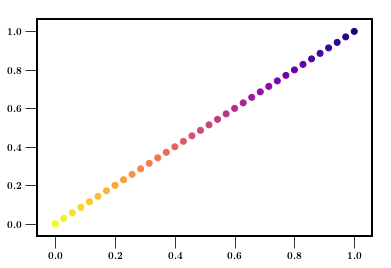

In [298]:
cmapCustom = matplotlib.colors.LinearSegmentedColormap.from_list("", [   "blue", 'orange'])
cm       = plt.get_cmap('plasma_r')
nColors  = 36
mycolors = [cm(x) for x in np.linspace(0,1 , (nColors))] 


xx=np.linspace(0,1,nColors)




plt.scatter(xx, xx, c=cm(xx))

In [330]:
def plotSinglePDF(DCOtype='BHNS', BPSnameslist=['A'], xvarname=0, bins=20, axe=None,  ylim=None, xlabel='xlabel', ylabel='ylabel', whichWeight='det'):
    """  
    options:
    
    
    xvarind, index of the variable in the list ['Mass1', 'Mass2', 'tc',\
                   'log10(tc)', 'TotMass', 'ChirpMass', 'q', Z, log(Z/Zsun)]
    
    """
    
    
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    Zsolar=0.0142

    # naming is slightly different for some files
    if DCOtype=='BHNS':
        DCOname='BHNS'
    elif DCOtype=='BHBH':
        DCOname='BBH'
    elif DCOtype=='NSNS':
        DCOname='BNS'
    
    
    Virgo         = '/Volumes/Virgo/DATA/BHNS/'
    VirgoAllDCO = '/Volumes/Virgo/DATA/AllDCO/'
    AndromedaBHNS = '/Volumes/Andromeda/DATA/BHNS/'
    AndromedaAllDCO  = '/Volumes/Andromeda/DATA/AllDCO/'

    alphabet = list(string.ascii_uppercase)
    BPSnameslistD = alphabet[:12]

    BPSdir = ['fiducial/', 'fiducial/', 'alpha0_5/', 'alpha2_0/', 'unstableCaseBB/', 'rapid/', 'zeroBHkick/', 'massTransferEfficiencyFixed_0_25/', 'massTransferEfficiencyFixed_0_5/', 'massTransferEfficiencyFixed_0_75/', 'ccSNkick_100km_s/', 'ccSNkick_30km_s/']

    dictBPSnameToDir   = dict(zip(BPSnameslistD, BPSdir))    
    dictBPSnameToColor = dict(zip(BPSnameslistD, BPScolors))
    
    for ind_m, BPSmodelName in enumerate(BPSnameslist):
        # READ IN DATAFILE 
        if BPSmodelName in ['A', 'B', 'C',  'D', 'E', 'F', 'G', 'H',  'I', 'J', 'K', 'L']:
            path1 = AndromedaAllDCO
            path1 = path1 + dictBPSnameToDir[BPSmodelName]
            path = path1 + 'COMPASCompactOutput_'+ DCOname +'_' + BPSmodelName + '.h5'
        else:
            print('error: path does not exist')    



        fdata = h5.File(path)

        # obtain BH and NS masses
        if xvarname in ['Mass1', 'Mass2', 'TotMass', 'ChirpMass', 'q']:
            M1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
            M2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
            MBH, MNS = obtainM1BHandM2BHassymetric(M1, M2)
            del M1
            del M2  

            if xvarname=='Mass1':
                xvar = MBH
            elif xvarname=='Mass2':
                xvar = MNS
            elif xvarname=='TotMass':
                xvar = MBH + MNS
            elif xvarname=='ChirpMass':
                xvar = chirpmass(MBH,MNS)
            elif xvarname=='q':
                xvar = MBH/MNS

        elif xvarname in ['tc','log10(tc)']:
            xvar = fdata['doubleCompactObjects']['tc'][...].squeeze() /1000.  # in Gyr
            if xvarname=='log10(tc)':
                xvar = np.log10(xvar)

        elif xvarname in ['metallicitySystems', 'log10metallicitySystems']:
            xvar = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            if xvarname=='log10metallicitySystems':
                xvar = np.log10(xvar/Zsolar)

        else: 
            print('error in xvarname')




   

        print('now at model ', BPSmodelName)



        ind_max = len(MSSFRnameslist) + xvarind*len(MSSFRnameslist)
        ind_min = xvarind*len(MSSFRnameslist)

        dx = 0.3
        dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) + ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)


        # which weights do we want?
        if whichWeight =='det':
            fparam_name ='weights_detected'
        elif whichWeight=='z0':
            fparam_name = 'weights_intrinsic'



        for ind_mssfr, mssfr in enumerate([MSSFRnameslist[0]]):
            weightheader = 'w_' + mssfr
            weights = fdata[fparam_name][weightheader][...].squeeze()


#                 print('now at mssfr ', ind_mssfr+1, 'out of ', len(MSSFRnameslist))        




            hist, bin_edges = np.histogram(a=xvar, bins=bins, density=True, weights=weights)
            hist = hist * (bins[-1]-bins[0])/(len(bins)-1) # normalize s.t. np.sum(hist)=1
            
            
            
            hhhh =axe.hist(xvar, bins=bins, density=True, weights=weights)
            print(hhhh, 'hhh')
#                 print(np.sum(hist), '=1? should be!!!!')
            if ind_mssfr==0:
                print(hist)


#             xx = dxrange[ind_mssfr]
#             xxx = [dxrange[ind_mssfr]-dxlen, dxrange[ind_mssfr]+dxlen]
#             cm       = plt.get_cmap('plasma_r')


#             # iterate over histogram bins (from low to high)
#             for ind_bin, binedge in enumerate(bin_edges[1:]):
#                 # get alpha mapping from function

#                 ALPHA = histvalueToAlphaLin(hist[ind_bin])

#                 yyy1 = bin_edges[ind_bin]
# #                 axe.fill_between(xxx, y1=[yyy1, yyy1], y2=[binedge,binedge], alpha=1, color='white', \
# #                                  zorder=100,  edgecolor='k', lw=20)
#                 axe.fill_between(xxx, y1=[yyy1, yyy1], y2=[binedge,binedge], color=cm(ALPHA), \
#                                  zorder=200, edgecolor='k', lw=0.5)






            
                
#                 if interval=='median':
#                     if (ind_m==0) & (ind_mssfr==0):
#                         axe.scatter(xx, q0_5, \
#                                 c=BPScolors[ind_m], s=80, label=None, \
#                                 marker='*', zorder=300, edgecolor='black')                        
                        
#                     axe.scatter(xx, q0_5, \
#                                 c=BPScolors[ind_m], s=20, label=None, \
#                                 marker='.', zorder=200)        
#                 else:
                
#                     if interval =='99percent':
#                         zorder = 102
#                         yy = [q0_005, q0_995]
#                         alpha = 0.15
#                     elif interval=='90percent':
#                         zorder = 105
#                         yy = [q0_05, q0_95]
#                         alpha = 0.25    
#                     elif interval=='50percent':
#                         zorder = 110
#                         yy = [q0_25, q0_75]
#                         alpha = 0.4                         
                        
#                     axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
#                            width=dxlen, zorder=zorder-1)
#                     axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color=BPScolors[ind_m], alpha=alpha, \
#                            width=dxlen, zorder=zorder)

                    
                    
                    
         
#         if (ind_m ==(len(BPSnameslist)-1)) & (xvarind==0):
#             # we will plot some text for last value:
#             fontsize = fs-10
#             xxb= xx+dxlen*3
#             dxx = dxlen*8
#             textt = 'median' 
#             axe.text(xxb, q0_5, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold' , zorder=10)
            
            
#             textt = ' 50'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_75-q0_25)*0.75 + q0_25
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.8, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )            
            
            
#             textt = ' 90'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_95-q0_05)*0.75 + q0_05
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.5, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )
            
#             textt = ' 99'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_995-q0_005)*0.88 + q0_005
            
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.3, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )
            
            
            
#     xx = [-0.5, len(BPSnameslist)+0.5]
#     yymax90, yymin90 = [maxq0_95, maxq0_95],  [minq0_05, minq0_05]
#     yymax99, yymin99 = [maxq0_995, maxq0_995],  [minq0_005, minq0_005]
#     yymax50, yymin50 = [maxq0_75, maxq0_75],  [minq0_25, minq0_25]


#     axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='white', zorder=0 , alpha =1 )
#     axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='lightgray', zorder=1 , alpha =0.15 )
    
#     axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='white', zorder=2 , alpha =1 )
#     axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='lightgray', zorder=3 , alpha =0.5 )
    
#     axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='white', zorder=4 , alpha =1 )     
#     axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='lightgray', zorder=5 , alpha =0.8 )    


    
#     axe.set_xlim(-0.5, len(BPSnameslist)+0.5)

#     axe.set_ylim(ylim[0], ylim[1])
    
#     axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=20)
    
#     axe.set_xticks(range(len(BPSnameslist)))
#     axe.set_xticklabels(BPSnameslist)
    
#     if xvarind==0:
#         ax2 = axe.twiny()
#         ax2.set_xticks(range(len(MSSFRnameslist)+1))
#         MSSFRlabels = np.concatenate((np.asarray([r'$ \rm{xyz}: $ ']), MSSFRnameslist))
#         ax2.set_xticklabels(MSSFRlabels, rotation=0, fontsize=15)    

#         ax2.set_xlim(np.min(range(len(MSSFRnameslist)+1)), np.max(range(len(MSSFRnameslist)+2)))
#         ax2.tick_params(top=False)
        
    return 
            
            

            
    
    
    
    

now at model  A
(array([3.11971886e-02, 4.56333193e-02, 4.82794462e-02, 6.22276268e-02,
       8.90612043e-02, 1.16837553e-01, 1.19468508e-01, 7.48724055e-02,
       1.75294189e-02, 1.99075498e-03, 1.27488143e-04, 1.76380121e-05,
       3.34304793e-07, 2.33252277e-04, 1.58002546e-06, 3.71974949e-06,
       6.86101755e-05, 0.00000000e+00, 6.41021425e-07, 3.84016068e-07,
       4.38633279e-05, 7.54142621e-14, 0.00000000e+00, 0.00000000e+00]), array([ 2.5       ,  4.14583333,  5.79166667,  7.4375    ,  9.08333333,
       10.72916667, 12.375     , 14.02083333, 15.66666667, 17.3125    ,
       18.95833333, 20.60416667, 22.25      , 23.89583333, 25.54166667,
       27.1875    , 28.83333333, 30.47916667, 32.125     , 33.77083333,
       35.41666667, 37.0625    , 38.70833333, 40.35416667, 42.        ]), <a list of 24 Patch objects>) hhh
[5.13453729e-02 7.51048380e-02 7.94599218e-02 1.02416302e-01
 1.46579899e-01 1.92295140e-01 1.96625252e-01 1.23227501e-01
 2.88505020e-02 3.27645090e-03 2.0982

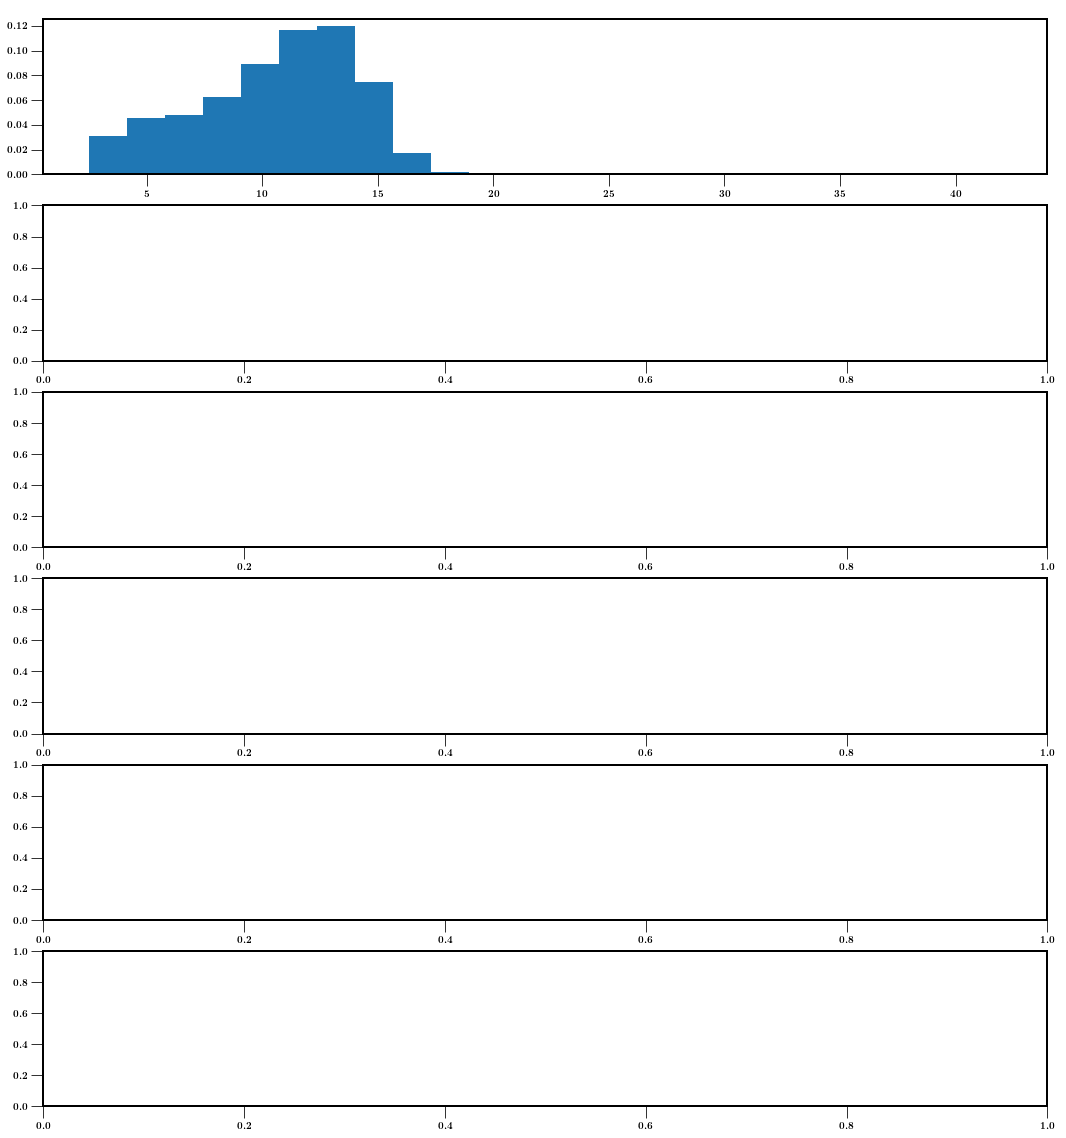

In [331]:
NumberBPSmodels=12
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='BHNS'
ncols, nrows= 1,6
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

xlabel = r'binary population synthesis model $\mu$'

ylabel = r'$m_{\rm{BH}}   \, [\rm{M}_{\odot}]$'

# plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
#                               axe=axe[0],  ylim=[1,2.5], xlabel=xlabel, ylabel=ylabel)


bins = np.linspace(2.5,42,25)
xvarname='Mass1'
plotSinglePDF(DCOtype=DCOtype, BPSnameslist=['A'], xvarname=xvarname, bins=bins, axe=axe[0],  ylim=[2.5,25], \
 xlabel='xlabel', ylabel=ylabel, whichWeight='det')
    


# print('lemme just save this image')
# f.savefig('./PDF_BPSandMSSFRvariations_Summary_' +DCOtype + '_Z.png', dpi=600 ) #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
# f.savefig('./PDF_BPSandMSSFRvariations_Summary_' +DCOtype +'_Z.pdf') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

In [245]:
np.logspace(-3, np.log10(0.3), 5)

array([0.001     , 0.00416179, 0.01732051, 0.07208434, 0.3       ])

In [ ]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q']

NumberBPSmodels=12
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='NSNS'
ncols, nrows= 1,6
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

xlabel = r'binary population synthesis model $\mu$'

ylabel = r'$m_{\rm{NS,1}}   \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[1,2.5], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$m_{\rm{NS,2}}  \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[1,2.5], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[2,5], xlabel=xlabel, ylabel=ylabel)
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[1,2.3], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[1,2], xlabel=xlabel, ylabel=ylabel)


print('forlast')
ylabel = r'$\log(Z _{\rm{i}} / Z_{\odot})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[-2.6,0.4], xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

print('let me just save the image for you!')

f.savefig('./CDF_BPSandMSSFRvariations_Summary_' +DCOtype + '_Z.png') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./CDF_BPSandMSSFRvariations_Summary_' +DCOtype +'_Z.pdf') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

In [88]:
rand1 = np.linspace(1,20,2000)
# rand2 = np.linspace(1,1.75, 200)

# AAA = np.concatenate((rand1, rand2))

xxx = np.ones_like(AAA)

print(len(AAA[:-1]))

2199


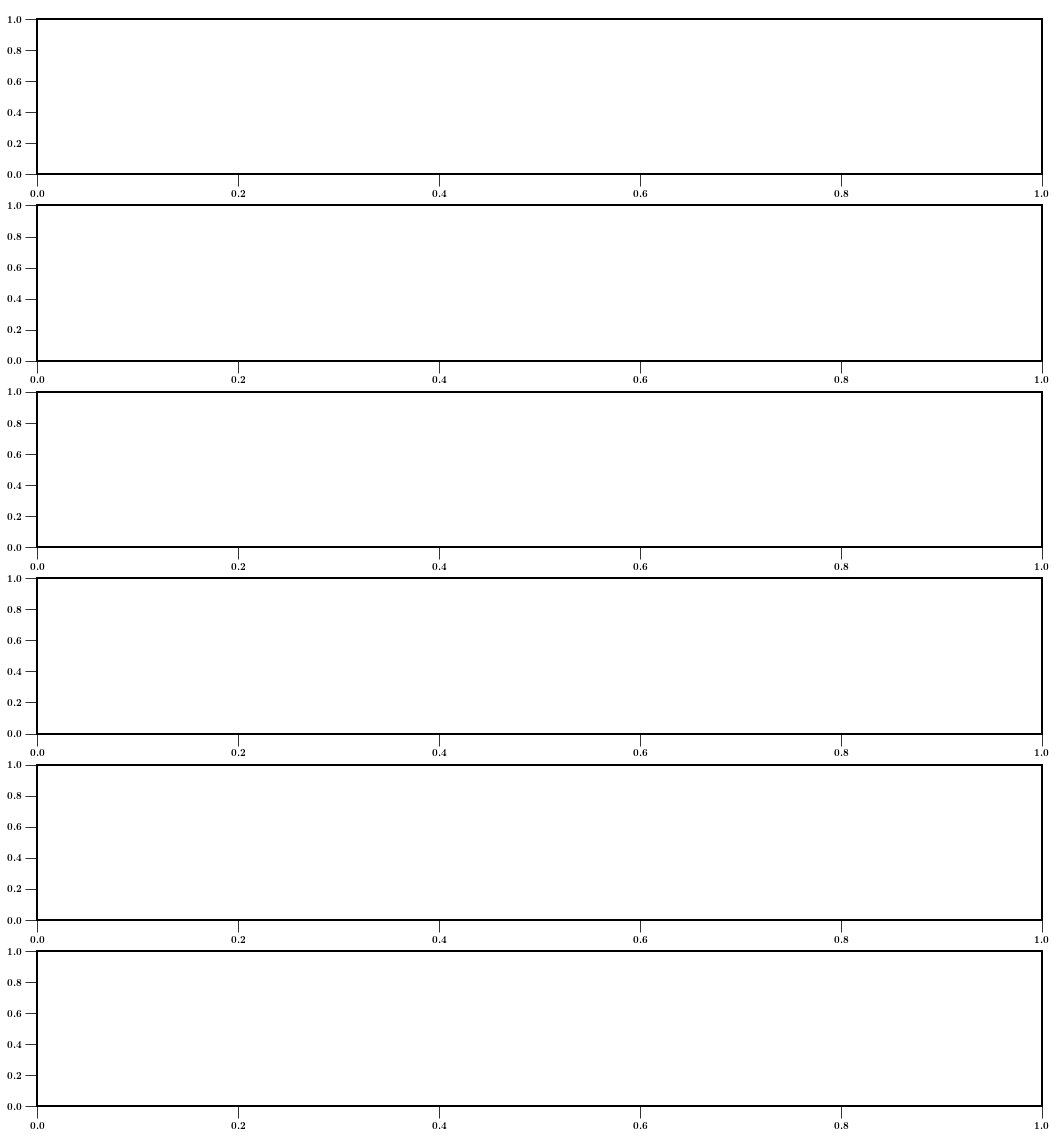

In [160]:
DCOtype='NSNS'
ncols, nrows= 1,6

bins = np.linspace(1, 20, 31)

f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

weights = np.ones(len(AAA))*0.5
h,edges= np.histogram(AAA, bins=bins, density=True, weights=weights)



In [166]:
print((h[0]))
print(np.sum(h)* (bins[-1]-bins[0])/(len(bins)-1))

0.16937799043062202
1.0000000000000002


In [162]:
print(len(h))
print(len(edges))

30
31


In [165]:
print(

1.0


In [ ]:
|